In [1]:
## extract feature from original image and sobel filtered image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from scipy.sparse import dok_matrix,coo_matrix,csr_matrix,vstack,save_npz

import pandas as pd
import sys
from pathlib2 import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import pickle
from joblib import dump, load
import lightgbm as lgb

In [2]:
def cal_dice(tp,fp,fn):
    return (2*tp)/(2*tp+fp+fn)

def kedney_or_tumor(x):
    y = x.copy()
    y[y==2] = 1
    y[y==3] = 0
    return y

def tumor_only(y):
    x = y.copy()
    x[x==1] = 0
    x[x==3] = 0
    return x



In [3]:
data_train = np.load('data_train.npy')
data_train.shape

(876480949, 9)

In [4]:
# np.unique(data_train[:,-1])

array([-1.,  0.,  1.,  2.,  3.], dtype=float32)

In [4]:
# (data_train[:,-1]==-1).sum()

575

In [4]:
# index_0 = np.arange(0,len(data_train),25)
index_0 = data_train[:,-1]==0
index_1 = data_train[:,-1]==1
index_2 = data_train[:,-1]==2
index_3 = data_train[:,-1]==3

In [5]:
data_0 = data_train[index_0,:]
data_1 = data_train[index_1,:]
data_2 = data_train[index_2,:]
data_3 = data_train[index_3,:]

In [ ]:
# print(data_0.shape)
# data_0 = np.unique(data_0,axis = 0)
# print(data_0.shape)

In [6]:
# data_3.shape

(967, 6)

In [6]:
forest = RandomForestClassifier(n_estimators=0,
                                bootstrap = True,
                                max_samples = 0.25,
                                min_samples_split = 10,
                                min_samples_leaf = 5,
                                class_weight = 'balanced',
                                max_depth=30, 
                                random_state=456,
                                n_jobs=8,
#                                 max_features=2,
#                                 criterion='entropy',
                                verbose=2,
#                                 ccp_alpha=0.00001,
                                warm_start=True)


In [7]:
slice_num = 25
for i in range(slice_num):
    print(i)
    data_new_slice = np.concatenate((np.unique(data_0[np.arange(i,len(data_0),slice_num)],axis=0),
                               data_1[np.arange(i,len(data_1),slice_num)],
                               data_2[np.arange(i,len(data_2),slice_num)],
                               data_3[np.arange(i,len(data_3),slice_num)]),0)

    fea_datasets = data_new_slice[:,:8]
    target_list = data_new_slice[:,8]
    
    forest.n_estimators = forest.n_estimators + 8
    forest.fit(fea_datasets, target_list)
    
    

0


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   35.7s remaining:   59.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   39.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   39.4s finished


1


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.3s remaining:   50.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s finished


2


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   31.7s remaining:   52.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   35.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   35.1s finished


3


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.6s remaining:   51.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   34.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   34.9s finished


4


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.0s remaining:   48.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.2s finished


5


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.6s remaining:   49.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.8s finished


6


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.2s remaining:   50.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.4s finished


7


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8building tree 6 of 8
building tree 7 of 8

building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.1s remaining:   50.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.2s finished


8


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.7s remaining:   51.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.7s finished


9


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.3s remaining:   50.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   31.7s finished


10


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   32.0s remaining:   53.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   35.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   35.4s finished


11


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.2s remaining:   50.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   31.7s finished


12


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.2s remaining:   48.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.1s finished


13


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.1s remaining:   48.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   30.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   30.2s finished


14


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8building tree 4 of 8
building tree 5 of 8building tree 6 of 8
building tree 7 of 8
building tree 8 of 8




[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   28.2s remaining:   46.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.4s finished


15


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   28.1s remaining:   46.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   30.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   30.0s finished


16


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.4s remaining:   49.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s finished


17


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.0s remaining:   48.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.8s finished


18


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.9s remaining:   49.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.2s finished


19


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.7s remaining:   49.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.5s finished


20


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.4s remaining:   49.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.4s finished


21


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.9s remaining:   49.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.0s finished


22


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   30.7s remaining:   51.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.5s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.5s finished


23


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   29.6s remaining:   49.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   32.9s finished


24


/home/wenbo/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 8
building tree 2 of 8building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8



[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   31.4s remaining:   52.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.4s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   33.4s finished


In [8]:
dump(forest, 'RF_warmv3.joblib')

['RF_warmv3.joblib']

In [ ]:
# target_list = target_list[~np.isnan(fea_datasets).any(axis=1)]


# fea_datasets = fea_datasets[~np.isnan(fea_datasets).any(axis=1), :]

In [ ]:
# y_true_temp = data_train[:,5]
# # ypred = bst.predict(fea_datasets)
# pred = forest.predict(data_train[:,:5])
# # pred = np.argmax(ypred, axis=1)
# accuracy = accuracy_score(y_true_temp, pred)

# cm1 = confusion_matrix(kedney_or_tumor(y_true_temp), kedney_or_tumor(pred))
# cm2 = confusion_matrix(tumor_only(y_true_temp), tumor_only(pred))
# if cm1.shape[0]>1:
#     dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
# if cm2.shape[0]>1:
#     dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
# print(accuracy,dice1,dice2)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


In [3]:
# forest = load ('RF_warmv1.joblib')

In [9]:

data_val = np.load('data_val.npy')
fea_val = data_val[:,:8]
y_true = data_val[:,8]
y_true[y_true==-1]=0
id_val = data_val[:,9]

result_all = np.empty([63,3])
for i in range(63):
    fea_val_temp = fea_val[id_val==i,:]
    y_true_temp = y_true[id_val==i]
#     ypred = bst.predict(fea_val_temp)
    pred = forest.predict(fea_val_temp)
#     pred = np.argmax(ypred, axis=1)
    accuracy = accuracy_score(y_true_temp, pred)

    cm1 = confusion_matrix(kedney_or_tumor(y_true_temp), kedney_or_tumor(pred))
    cm2 = confusion_matrix(tumor_only(y_true_temp), tumor_only(pred))
    if cm1.shape[0]>1:
        dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
    if cm2.shape[0]>1:
        dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
    print(i,accuracy,dice1,dice2)
    result_all[i,:] = [accuracy,dice1,dice2]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    9.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.4s finished


0 0.9934580127078103 0.6921631534466207 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.0s finished


1 0.9928188952480056 0.7045604371456615 0.0024322830292979546


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.7s finished


2 0.9775337306175409 0.4219587057904026 0.004972375690607734


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.6s finished


3 0.9802327994152916 0.4631685976507104 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.3s finished


4 0.9843571149843913 0.4535757535541879 0.025365181628477076


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   18.0s finished


5 0.9846830338270681 0.2811215755977979 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.2s finished


6 0.9930230024898143 0.6581318899311361 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.4s finished


7 0.9766279642915823 0.5673125270407746 0.010732654978582461


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.1s finished


8 0.9851314294598725 0.6407616949845014 0.3827879618525498


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    9.4s finished


9 0.9868486421840675 0.5234266979077835 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.8s finished


10 0.9865070921985816 0.6434595584940604 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.0s finished


11 0.9934075313325531 0.6845300503940204 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.9s finished


12 0.9897516451433515 0.5401363598103308 0.002957360676799263


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    6.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    8.9s finished


13 0.9861163448655373 0.5440462191318575 0.004928024899494229


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.8s finished


14 0.9932321475026015 0.4581514906838646 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    8.0s finished


15 0.9811618974843652 0.6003702890137133 0.003795066413662239


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   12.9s finished


16 0.9889554269959469 0.627361458849362 0.00010502546867615396


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.4s finished


17 0.9901605017006803 0.6294886263205841 0.00016326530612244898


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    9.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.0s finished


18 0.9892606881130028 0.6099352784592098 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.7s finished


19 0.9966351273900884 0.8022174127653111 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.7s finished


20 0.9939018193938606 0.6662368605466013 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.6s finished


21 0.9880481798620787 0.6317687652801137 0.06608860704887623


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    9.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   12.4s finished


22 0.9878585132674298 0.5490999135858949 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.1s finished


23 0.9897577406612139 0.6689797559994637 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.3s finished


24 0.991985544217687 0.6494795990038951 0.44413191076624636


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    9.7s finished


25 0.9689667796422848 0.6204752155322497 0.33308206113124933


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.3s finished


26 0.984187766242846 0.421439659289922 0.13752732392278907


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.7s finished


27 0.9899843912591051 0.5748713799556546 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.3s finished


28 0.9923577125065036 0.682880195786012 0.17142599562757782


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.7s finished


29 0.9908016515429702 0.6098117726303185 0.15328511890169158


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.1s finished


30 0.9451014659026986 0.6398296451964913 0.4346378844531846


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    6.5s finished


31 0.9784736681208276 0.4727421919072773 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.8s finished


32 0.9953674441470024 0.6279131160177823 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.9s finished


33 0.9956142334238424 0.7516926514876834 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.4s finished


34 0.9944969280453304 0.7474644448552614 0.0007302696781597204


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.9s finished


35 0.9930699375243887 0.5860950698997414 0.0051952705123611605


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.0s finished


36 0.9936861322027836 0.7694437157798975 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.8s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.4s finished


37 0.9844312717465531 0.22042034507121303 0.3466694439898231


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.1s finished


38 0.9855393614911759 0.7629304830249247 0.30964512919468146


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.5s finished


39 0.9927401007426345 0.6229829500627019 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.1s finished


40 0.9934600488987508 0.4906986404409866 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    5.4s finished


41 0.9669790119952252 0.5381485591311073 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.7s finished


42 0.9572347073500945 0.3548802119831815 0.1744646430243944


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.4s finished


43 0.9920014298476671 0.6104168006459588 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.5s finished


44 0.992582164371423 0.6976936102715795 0.23485591060576358


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.5s finished


45 0.9678973930742277 0.3569247111937326 0.02639285407961967


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   17.1s finished


46 0.994491847074987 0.6308850896568516 0.16545500125344698


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   18.4s finished


47 0.9913211945564516 0.6403947431994975 0.13450131052558972


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   18.2s finished


48 0.992144057703564 0.5016345926999427 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.4s finished


49 0.9958284451793004 0.7739682261805768 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    8.6s finished


50 0.986507869707937 0.6805600114678116 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    5.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    7.1s finished


51 0.9846934330394832 0.6990969312257119 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   13.7s finished


52 0.9958063896734553 0.8075815056756535 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.3s finished


53 0.9958537886789622 0.7456647398843931 0.06326857957583318


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.0s finished


54 0.9922101103180281 0.5173319705184819 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.1s finished


55 0.9881093861781347 0.624507188084903 0.07862338323946452


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   12.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   16.3s finished


56 0.9814427994230359 0.3640471914709827 0.14414550394324743


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    7.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    9.7s finished


57 0.9865365938258758 0.3467298601003236 0.19085883454671781


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.9s finished


58 0.9892302482358871 0.4209728329037505 0.03748672029139475


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   10.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.3s finished


59 0.9882323666470615 0.48629674291161856 0.0


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.5s finished


60 0.9947469117862253 0.6316481532362523 0.0030197795560924054


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    6.2s finished


61 0.9671385420279801 0.46940628714832916 0.0541801296728222


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   11.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.5s finished


62 0.9930600296322191 0.5896986924388857 0.0013348907058234607


In [10]:
result_all.mean(axis=0)

array([0.98688544, 0.58415274, 0.06586104])

In [11]:
np.save('result_warm_v3',result_all)

In [14]:
forest.feature_importances_

array([0.17145673, 0.20021877, 0.13966215, 0.11506138, 0.09804927,
       0.08504041, 0.08925571, 0.10125557])

In [17]:
result_all.max(0)

array([0.99663513, 0.80758151, 0.44413191])

In [18]:
i=24
y_true_temp = y_true[id_val==i]
fea_val_temp = fea_val[id_val==i,:]
pred = forest.predict(fea_val_temp)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    8.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   11.5s finished


In [30]:
img = fea_val_temp[:,0]
img_path = f'./data/case_00{i:03}/imaging/'
slice_len = int(len([d for d in Path(img_path).iterdir()])/2)
image_size = int(np.sqrt(img.shape[0]/slice_len))

In [35]:
img_3d = img.reshape([slice_len,image_size,image_size])
label = y_true_temp.reshape([slice_len,image_size,image_size])
predict = pred.reshape([slice_len,image_size,image_size])

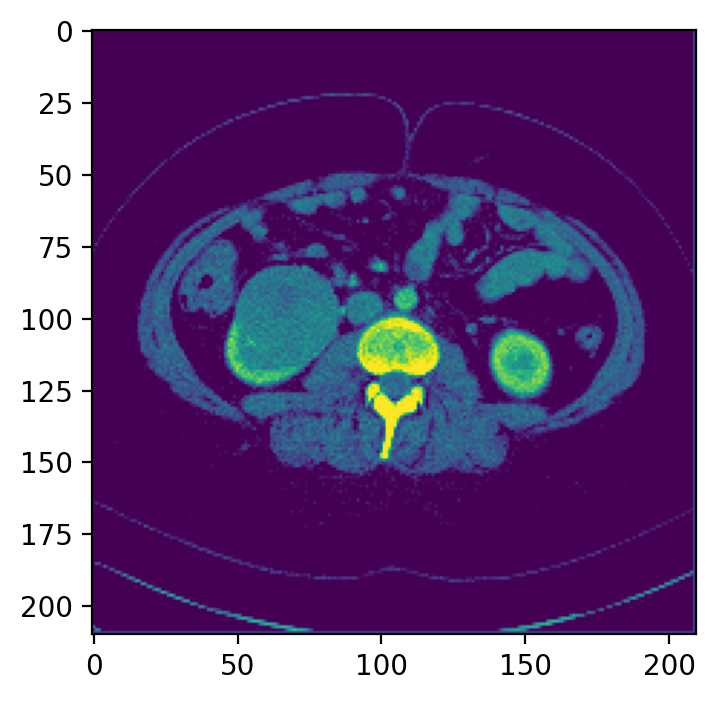

In [89]:
plt.rcParams['figure.dpi'] = 200
plt.imshow(img_3d[59])

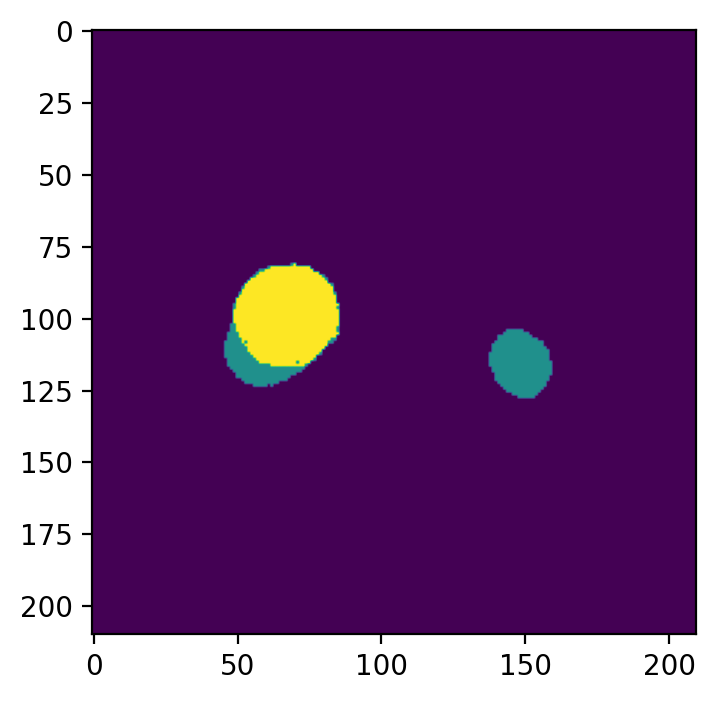

In [90]:
plt.imshow(label[59])

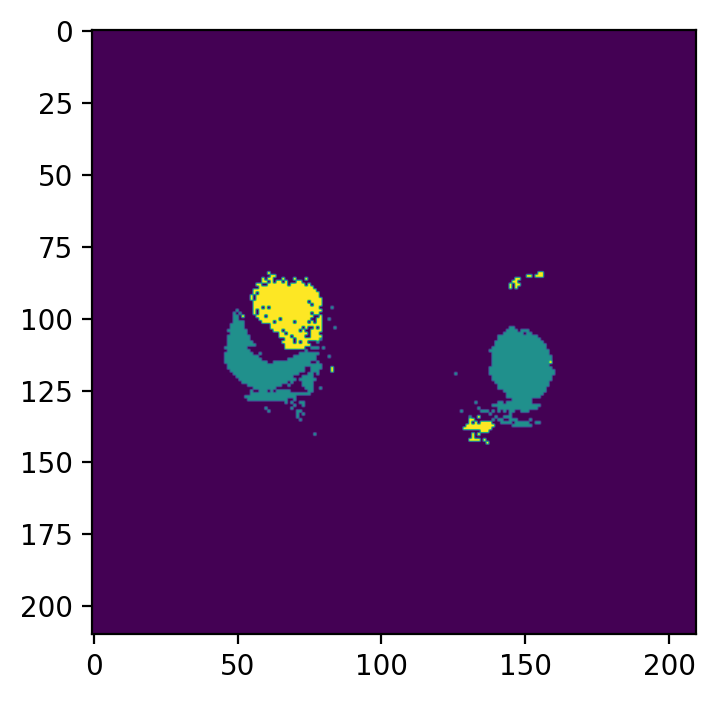

In [91]:
plt.imshow(predict[59])

In [62]:
np.unique(label[61])

array([0., 1., 2., 3.], dtype=float32)

In [69]:
(predict[59]==2).sum()

0

In [55]:
label.shape

(128, 210, 210)

In [45]:
len((np.where(label==2)[0]))

12998

In [54]:
np.bincount(np.where((label==predict)&(label==2))[0])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
         3,  99, 188, 248, 290, 359, 331, 413, 436, 473, 462, 411, 363,
       241, 172,  89])

In [24]:
slice_len

128

In [52]:
t = np.load('result_v2.npy')
t.mean(axis=0)

array([0.92325162, 0.20591091, 0.03725003])

In [53]:
t = np.load('result_v3.npy')
t.mean(axis=0)

array([0.93396437, 0.23405296, 0.04708714])

In [ ]:
cm1

In [ ]:
# y_true = y_true[~np.isnan(fea_val).any(axis=1)]
# id_val = id_val[~np.isnan(fea_val).any(axis=1)]

# fea_val = fea_val[~np.isnan(fea_val).any(axis=1), :]

In [26]:
# enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(target_list.reshape(-1,1))

OneHotEncoder(handle_unknown='ignore')

In [27]:
# enc.categories_

[array([0., 1., 2., 3.], dtype=float32)]

In [40]:
# target_onehot = enc.transform(target_list.reshape(-1,1)).toarray()

In [41]:
# target_onehot = pd.DataFrame(target_onehot)

In [44]:
train_data = lgb.Dataset(fea_datasets, label=target_list)

train_data.save_binary('train.bin')

[LightGBM] [Info] Saving data to binary file train.bin


In [45]:
train_data = lgb.Dataset('train.bin')

In [54]:
param = {'num_leaves': 31, 
#          'min_data_in_leaf':
         'objective': 'multiclass',
         'num_class':4,
         'boosting':'gbdt',
         'tree_learner ':'data',
         'num_threads':8,
         'device_type':'cpu',
#          'device_type':'gpu',
#         'force_row_wise':True,
#         'force_col_wise':True,
        'bagging_fraction':0.75,
        'verbose': 5,
        'bagging_freq':10}
# param['metric'] = 'multi_error'

In [ ]:
bst = 

In [55]:
num_round = 100
bst = lgb.train(param, train_data, num_round)

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.000402
[LightGBM] [Debug] init for col-wise cost 0.000026 seconds, init for row-wise cost 0.309516 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.250618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 33252429, number of used features: 5
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Info] Start training from score -0.327498
[LightGBM] [Info] Start training from score -1.507155
[LightGBM] [Info] Start training from score -2.852376
[LightGBM] [Info] Start training from score -10.445440
[LightGBM] [Debug] Re-bagging, using 24939836 data to train
[LightGBM] [Debug] Trained a tree with leaves = 31 and depth = 7
[LightGBM] [Debug] Trained a tree wi

In [ ]:
bst.save_model('model.txt')

In [56]:
y_true_temp = target_list
ypred = bst.predict(fea_datasets)
# pred = forest.predict(fea_datasets)
pred = np.argmax(ypred, axis=1)
accuracy = accuracy_score(y_true_temp, pred)

cm1 = confusion_matrix(kedney_or_tumor(y_true_temp), kedney_or_tumor(pred))
cm2 = confusion_matrix(tumor_only(y_true_temp), tumor_only(pred))
if cm1.shape[0]>1:
    dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
if cm2.shape[0]>1:
    dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
print(accuracy,dice1,dice2)

0.8671987841850591 0.7946169518805983 0.25499198541406


In [57]:

data_val = np.load('data_val.npy')
fea_val = data_val[:,:5]
y_true = data_val[:,5]
y_true[y_true==-1]=0
id_val = data_val[:,6]

result_all = np.empty([63,3])
for i in range(63):
    fea_val_temp = fea_val[id_val==i,:]
    y_true_temp = y_true[id_val==i]
    ypred = bst.predict(fea_val_temp)
#     pred = forest.predict(fea_val_temp)
    pred = np.argmax(ypred, axis=1)
    accuracy = accuracy_score(y_true_temp, pred)

    cm1 = confusion_matrix(kedney_or_tumor(y_true_temp), kedney_or_tumor(pred))
    cm2 = confusion_matrix(tumor_only(y_true_temp), tumor_only(pred))
    if cm1.shape[0]>1:
        dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
    if cm2.shape[0]>1:
        dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
    print(i,accuracy,dice1,dice2)
    result_all[i,:] = [accuracy,dice1,dice2]

0 0.980937262341868 0.4115341990699253 0.0
1 0.9661223188211204 0.34219762694999695 0.0
2 0.9545979544841408 0.32969170460444275 0.030787943289368656
3 0.9666676731826966 0.33378370485739317 0.0
4 0.9591026599895942 0.14914337785954593 0.0004139072847682119
5 0.9377257221075052 0.13536389879981242 0.0
6 0.9477721819827977 0.2017217290185971 0.0
7 0.9621853150044727 0.3841732895810019 0.01110994928634914
8 0.9564550679630593 0.42907726979273525 0.14166777879294945
9 0.9753137104000462 0.2969467974101894 0.0
10 0.9568033392434988 0.2301704966641957 0.0
11 0.945257048679019 0.22073542262003165 0.006825676815706726
12 0.9589984431272509 0.30074913960584837 0.05104251938171137
13 0.9411085490637062 0.1580529039883948 0.0022640732736441288
14 0.962994022746488 0.06586075393147069 0.0
15 0.9246585062467143 0.26615306467998645 0.0
16 0.9413917060396833 0.2272559924992514 0.0001679590179996081
17 0.9360976473922903 0.20943369704636902 0.00010535187526337969
18 0.9792753489826643 0.4474235363811

In [51]:
result_all.mean(axis=0)

array([0.92044728, 0.20320874, 0.03876046])

In [ ]:
y_true = y_true[~np.isnan(fea_val).any(axis=1)]
id_val = id_val[~np.isnan(fea_val).any(axis=1)]

fea_val = fea_val[~np.isnan(fea_val).any(axis=1), :]

In [ ]:
result_all = np.empty([63,3])
for i in range(63):
    fea_val_temp = fea_val[id_val==i,:]
    y_true_temp = y_true[id_val==i]
#     ypred = bst.predict(fea_val_temp)
    pred = forest.predict(fea_val_temp)
#     pred = np.argmax(ypred, axis=1)
    accuracy = accuracy_score(y_true_temp, pred)

    cm1 = confusion_matrix(kedney_or_tumor(y_true_temp), kedney_or_tumor(pred))
    cm2 = confusion_matrix(tumor_only(y_true_temp), tumor_only(pred))
    if cm1.shape[0]>1:
        dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
    if cm2.shape[0]>1:
        dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
    print(i,accuracy,dice1,dice2)
    result_all[i,:] = [accuracy,dice1,dice2]

In [ ]:
result_all.mean(axis=0)

In [ ]:
np.save('result_v2',result_all)

In [ ]:
print(accuracy,dice1,dice2)

In [ ]:
index_vali = np.arange(int(np.round(0.1*len(data))))
data_vali = data[index_vali,:]
                       

In [ ]:
# np.unique((data_vali[:,-1]))

In [ ]:
ypred = bst.predict(data_vali[:,:4])

In [ ]:
ypred

In [ ]:
pred = np.argmax(ypred, axis=1)

In [ ]:
np.unique(pred)

In [ ]:
y_true = data_vali[:,-1]

accuracy = accuracy_score(y_true, pred)

cm1 = confusion_matrix(kedney_or_tumor(y_true), kedney_or_tumor(pred))
cm2 = confusion_matrix(tumor_only(y_true), tumor_only(pred))
if cm1.shape[0]>1:
    dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
if cm2.shape[0]>1:
    dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])

In [ ]:
print(accuracy,dice1,dice2)

In [ ]:
print(accuracy,dice1,dice2)

In [5]:
model = load ('RF_warmv2.joblib')

In [6]:
model.feature_importances_

array([0.23357023, 0.29375179, 0.17601601, 0.15365656, 0.14300541])

In [ ]:
pred = model.predict(data_vali[:,:4])

In [ ]:
accuracy = accuracy_score(y_true, pred)

cm1 = confusion_matrix(kedney_or_tumor(y_true), kedney_or_tumor(pred))
cm2 = confusion_matrix(tumor_only(y_true), tumor_only(pred))
if cm1.shape[0]>1:
    dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
if cm2.shape[0]>1:
    dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
print(accuracy,dice1,dice2)

In [ ]:
cm1

In [ ]:
dice1

In [ ]:
dice2

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(fea_datasets, target_list, test_size = 0.4, random_state = 0)
Val_num = int(np.round(0.9*len(data)))

x_train = fea_datasets[Val_num:,:]
x_test = fea_datasets[:Val_num,:]
y_train = target_list[Val_num:]
y_test = target_list[:Val_num]

In [ ]:
# forest = RandomForestClassifier(n_estimators=4, random_state=456,n_jobs=4,max_features=2,criterion='entropy',warm_start=True)
forest = RandomForestClassifier(n_estimators=200,max_depth=10, random_state=456,n_jobs=4,max_features=2,criterion='entropy',warm_start=False)

In [ ]:
x_train[np.isnan(x_train)].shape

In [ ]:
y_train = y_train[~np.isnan(x_train).any(axis=1)]
x_train = x_train[~np.isnan(x_train).any(axis=1), :]


In [ ]:
forest = forest.fit(x_train, y_train)
dump(forest, 'RF_v2.joblib')

In [ ]:
2

In [ ]:
3

In [ ]:
data = pd.DataFrame(data)
data.columns = ['original','mean','mean_sobel','square','label']
data

In [ ]:
np.unique(data.label)

In [ ]:
data.loc[data['label']==-1]

In [ ]:
data.loc[data['label']==-1,['label']]=0

In [ ]:
data.loc[2871179,'label']

In [ ]:
Val_num = int(np.round(0.3*len(data)))
Val_num

In [ ]:
X_train = data[['original','mean','mean_sobel','square']][Val_num:]
y_train = data['label'][Val_num:]

In [ ]:
X_train = csr_matrix(X_train)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(fea_datasets, target_list, test_size = 0.2, random_state = 0)

In [ ]:
X_val = data[['original','mean','mean_sobel','square']][:Val_num]
y_val = data['label'][:Val_num]

In [ ]:
# t=0
dice_best = 0
slice = 248*248
for i in [182]:
#     t = t + 1
#     forest.set_params(n_estimators=t)
#     train_slice = X_train[slice*(i):slice*(i+1)]
    train_slice = data_cpu[['original','mean','mean_sobel','square']][Val_num:Val_num+slice*(i+1)]
#     y_slice = y_train[slice*(i):slice*(i+1)]
    y_slice = data_cpu['label'][Val_num:Val_num+slice*(i+1)]
    forest = forest.fit(train_slice, y_slice)
    print(i)
    
    
#     if np.mod(i,100)== 0:
#         print(i)
#         choose = np.random.randint(0, high=63, size=1, dtype='l')[0]
#         val_slice = data_cpu[['original','mean','mean_sobel','square']][choose*128*248*248:(choose+1)*128*248*248]
#         output_val = forest.predict(val_slice)
#         y_true = data_cpu['label'][choose*128*248*248:(choose+1)*128*248*248]
        
#         accuracy = accuracy_score(y_true, output_val)

#         cm1 = confusion_matrix(kedney_or_tumor(y_true), kedney_or_tumor(output_val))
#         cm2 = confusion_matrix(tumor_only(y_true), tumor_only(output_val))
#         if cm1.shape[0]>1:
#             dice1 = cal_dice(cm1[1,1],cm1[0,1],cm1[1,0])
#         if cm2.shape[0]>1:
#             dice2 = cal_dice(cm2[1,1],cm2[0,1],cm2[1,0])
#         if (dice1+dice2)/2 > dice_best:
#             dice_best = (dice1+dice2)/2
#             dump(forest, 'RF_v1.joblib') 
#             print('save model')
#         print(choose)
#         print(accuracy,dice1,dice2)